In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dp_0m = np.load('dist_path_0m.npz')['dist_path']
dp_2m = np.load('dist_path_2m.npz')['dist_path']

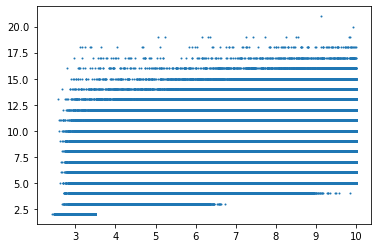

In [27]:
plt.scatter(dp_0m[:,0], dp_0m[:,1], s=1)

In [28]:
def averaging(dp):
    r = np.linspace(2, 10, 16)
    p_avg = np.zeros_like(r)
    p_std = np.zeros_like(r)
    dr = r[1] - r[0]

    for i in range(len(r)):
        mask = np.where((dp[:,0] > r[i]) & (dp[:,0] < r[i]+dr))
        p_avg[i] = np.mean(dp[mask][:,1])
        p_std[i] = np.std(dp[mask][:,1])
        
    return(r, p_avg, p_std)

r, p_avg_0m, p_std_0m = averaging(dp_0m)
_, p_avg_2m, p_std_2m = averaging(dp_2m)

<ErrorbarContainer object of 3 artists>

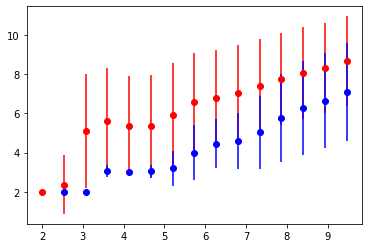

In [30]:
plt.errorbar(r, p_avg_0m, yerr=p_std_0m, fmt='o', c='red')
plt.errorbar(r, p_avg_2m, yerr=p_std_2m, fmt='o', c='blue')